## Write a program (2 functions) that works exactly like the sorted() built-in function in python.

In [1]:
import time

### my bubble sort -- using the original bubble sort function

In [2]:
def bubble_sort(iterable, key = None, reverse = False):
    """
    Return a new list containing all items from the iterable sorted by the specified key function using bubble sort.
    By default, the function will sort in ascending order. Use reverse = True to sort in descending order
    """
    start = time.time()
    nComp = 0
    nSwap = 0
    #copy the iterable to iterable_list, so we won't make any changes on iterable
    iterable_list = list(iterable)
    if key is None:
        #case1: key = None and reverse = False (default case)
        if reverse is False: 
            #Set the range for number of comparisons (first pass: n, second pass: n-1  and so on)
            #every pass we do one less comparison than before since one item's position was found in previous pass
            for pass_num in range(len(iterable_list) - 1, 0, -1):
                for i in range(pass_num):   
                    nComp += 1
                    #comparing two consecutive items in iterable_list
                    if iterable_list[i] > iterable_list[i + 1]:  
                        #if the latter < the former, swap two items
                        iterable_list[i], iterable_list[i + 1] = iterable_list[i + 1], iterable_list[i]
                        nSwap += 1
            #record the running time of sorting iterable under case 1
            tMeasure = time.time() - start
                
        else:
            #case2: key = None and reverse = True
            for pass_num in range(len(iterable_list) - 1, 0, -1):
                for i in range(pass_num):
                    nComp += 1
                    if iterable_list[i] < iterable_list[i + 1]:
                        #comparing two consecutive items, if the former < the latter, swap two items
                        iterable_list[i],iterable_list[i + 1] = iterable_list[i + 1] ,iterable_list[i]
                        nSwap += 1
            tMeasure = time.time() - start
    else:
        if reverse is False:
            #case3: key is not None and reverse = False
            for pass_num in range(len(iterable_list) - 1, 0, -1):
                for i in range(pass_num):
                    nComp += 1
                    #since key is not None, we should sort by key(iterable_list[i]) instead of iterable_list[i]
                    if key(iterable_list[i]) > key(iterable_list[i + 1]):   
                        #comparing two consecutive items, if key(the former) > key(the latter), swap two items
                        iterable_list[i], iterable_list[i + 1] = iterable_list[i + 1], iterable_list[i]
                        nSwap += 1
            tMeasure = time.time() - start
        else:
            #case4: key is not None and reverse = True
            for pass_num in range(len(iterable_list) - 1, 0, -1):
                for i in range(pass_num):
                    nComp += 1
                    if key(iterable_list[i]) < key(iterable_list[i + 1]):  
                        #comparing two consecutive items, if key(the former) < key(the latter), swap two items
                        iterable_list[i], iterable_list[i + 1] = iterable_list[i + 1], iterable_list[i]
                        nSwap += 1
            tMeasure = time.time() - start
    return (iterable_list, "Number of Comparison: "+ str(nComp), "Number of Swap: "+ str(nSwap),
            "Timer Measure(in seconds): " + str(tMeasure))

### Test my bubble sort function

In [3]:
#test 1: list
#empty_list
I1 = []
#list of numbers
I2 = [6,2,8,-2,4,8,3,9,1,8,7]
#list of strings
I3 = ['Andrew', 'Sandy', 'Joe', 'Zoe', 'amy']
#list of tuple
I4 = [('Jane', 12), ('Janet', 12), ('Sandy', 18)]
print(bubble_sort(I1))
print(bubble_sort(I1)[0] == sorted(I1))
print(bubble_sort(I2))
print(bubble_sort(I2)[0] == sorted(I2))
print(bubble_sort(I2, reverse = True))
print(bubble_sort(I2, reverse = True)[0] == sorted(I2, reverse = True))
print(bubble_sort(I3))
print(bubble_sort(I3)[0] == sorted(I3))
print(bubble_sort(I3, key = str.lower, reverse = True))
print(bubble_sort(I3, key = str.lower, reverse = True)[0] == sorted(I3, key = str.lower, reverse = True))
print(bubble_sort(I4, key = lambda x: x[1]))
print(bubble_sort(I4, key = lambda x: x[1])[0] == sorted(I4,key = lambda x: x[1]))

([], 'Number of Comparison: 0', 'Number of Swap: 0', 'Timer Measure(in seconds): 3.0994415283203125e-06')
True
([-2, 1, 2, 3, 4, 6, 7, 8, 8, 8, 9], 'Number of Comparison: 55', 'Number of Swap: 22', 'Timer Measure(in seconds): 3.719329833984375e-05')
True
([9, 8, 8, 8, 7, 6, 4, 3, 2, 1, -2], 'Number of Comparison: 55', 'Number of Swap: 30', 'Timer Measure(in seconds): 3.504753112792969e-05')
True
(['Andrew', 'Joe', 'Sandy', 'Zoe', 'amy'], 'Number of Comparison: 10', 'Number of Swap: 1', 'Timer Measure(in seconds): 1.0013580322265625e-05')
True
(['Zoe', 'Sandy', 'Joe', 'Andrew', 'amy'], 'Number of Comparison: 10', 'Number of Swap: 5', 'Timer Measure(in seconds): 1.9073486328125e-05')
True
([('Jane', 12), ('Janet', 12), ('Sandy', 18)], 'Number of Comparison: 3', 'Number of Swap: 0', 'Timer Measure(in seconds): 4.00543212890625e-05')
True


In [4]:
#test 2: Tuple
t1 = (3, 1, 2)
t2 = ('c','a','b')
t3 = (['Jane', 12], ['Janet', 12], ['Sandy', 18])
print(bubble_sort(t1))
print(bubble_sort(t1)[0] == sorted(t1))
print(bubble_sort(t2, reverse = True))
print(bubble_sort(t2, reverse = True)[0] == sorted(t2, reverse = True))
print(bubble_sort(t3, key = lambda x: x[1]))
print(bubble_sort(t3, key = lambda x: x[1])[0] == sorted(t3, key = lambda x: x[1]))

([1, 2, 3], 'Number of Comparison: 3', 'Number of Swap: 2', 'Timer Measure(in seconds): 6.9141387939453125e-06')
True
(['c', 'b', 'a'], 'Number of Comparison: 3', 'Number of Swap: 1', 'Timer Measure(in seconds): 8.106231689453125e-06')
True
([['Jane', 12], ['Janet', 12], ['Sandy', 18]], 'Number of Comparison: 3', 'Number of Swap: 0', 'Timer Measure(in seconds): 8.106231689453125e-06')
True


In [5]:
#test 3: set
s = set([1,5,3,7,3,6,5,8,2,7,4])
print(bubble_sort(s))
print(bubble_sort(s)[0] == sorted(s))

([1, 2, 3, 4, 5, 6, 7, 8], 'Number of Comparison: 28', 'Number of Swap: 0', 'Timer Measure(in seconds): 1.6927719116210938e-05')
True


In [6]:
#test 4: user-defind objects
class Student:
        def __init__(self, name, grade, age):
                self.name = name
                self.grade = grade
                self.age = age
        def __repr__(self):
                return repr((self.name, self.grade, self.age)) # a printable representation
        def weighted_grade(self):
                return 'CBA'.index(self.grade) / float(self.age)
            
student_objects = [
        Student('john', 'B', 15),
        Student('jane', 'A', 10),
        Student('dave', 'B', 12),]
print(bubble_sort(student_objects, key = lambda x: x.grade))
print(bubble_sort(student_objects, key = lambda x: x.grade)[0] == sorted(student_objects, key = lambda x: x.grade))
print(bubble_sort(student_objects, key = lambda x: x.age, reverse = True))
print(bubble_sort(student_objects, key = lambda x: x.age, reverse = True)[0] == sorted(student_objects, key = lambda x: x.age, reverse = True))

([('jane', 'A', 10), ('john', 'B', 15), ('dave', 'B', 12)], 'Number of Comparison: 3', 'Number of Swap: 1', 'Timer Measure(in seconds): 9.298324584960938e-06')
True
([('john', 'B', 15), ('dave', 'B', 12), ('jane', 'A', 10)], 'Number of Comparison: 3', 'Number of Swap: 1', 'Timer Measure(in seconds): 8.821487426757812e-06')
True


In [7]:
#test 5: dictionary
student_dict = {
    'john': 'B',
    'jane': 'B',
    'dave': 'D'}
print(bubble_sort(student_dict, key = lambda name: student_dict[name], reverse = True))
print(bubble_sort(student_dict, key = lambda name: student_dict[name], reverse = True)[0] ==
     sorted(student_dict, key = lambda name: student_dict[name], reverse = True))


(['dave', 'john', 'jane'], 'Number of Comparison: 3', 'Number of Swap: 2', 'Timer Measure(in seconds): 9.059906005859375e-06')
True


In [8]:
#From Instructor test cases
test40=[90,'a','z','c']
key40=lambda x:sum([ord(item) for item in str(x)])
print(bubble_sort(test40, key=key40))
print(bubble_sort(test40, key=key40)[0] == sorted(test40, key=key40))

(['a', 'c', 90, 'z'], 'Number of Comparison: 6', 'Number of Swap: 3', 'Timer Measure(in seconds): 2.8848648071289062e-05')
True


### My merge sort

In [9]:
def merge_sort(iterable, key=None, reverse = False):
    """
    Return a new list containing all items from the iterable sorted by the specified key function using merge sort.
    By default, the function will sort in ascending order. Use reverse = True to sort in descending order
    """
    start = time.time()
    nComp = 0
    #copy the iterable list to a_list, so we won't make any changes on iterable
    a_list = list(iterable)
    if len(a_list) > 1:
        #split a_list into half(roughly)
        mid = len(a_list) // 2
        #apply recursion to sort left half and right half respectively and store the sorted result
        iter_left_half = merge_sort(a_list[:mid], key, reverse)[0]
        iter_right_half = merge_sort(a_list[mid:], key, reverse)[0]
        
        i = 0 #index of iter_left_half
        j = 0 #index of iter_right_half
        k = 0 #index of a_list (build up the sorted list)
        
        #If two halves both have uncompared items, then compare them with given indices
        while i < len(iter_left_half) and j < len(iter_right_half):
            nComp += 1
            if key is not None:
                #case 1: key is not None and reverse = True
                if reverse is True:      
                    #since key is not None, we should sort by key(iter_left_half[i]) instead of iter_left_half[i]
                    if key(iter_left_half[i]) >= key(iter_right_half[j]):
                        #if the item with index i in left half is larger, set a_list[k] equals to that item
                        a_list[k] = iter_left_half[i]
                        #item with original index i in iter_left_half has been used, move to the next one
                        i = i + 1
                    else:
                        #if item with index j in iter_right_half is larger, then set a_list[k] be that item
                        a_list[k] = iter_right_half[j]
                        #the pointer in iter_right_half should move to the next one
                        j = j + 1
                else:
                    #case 2: key is not None and reverse = False
                    if key(iter_left_half[i]) <=  key(iter_right_half[j]):
                    #reverse=False,set a_list[k] be the smaller one in (key(iter_left_half[i]),key(iter_right_half[j]))
                        a_list[k] = iter_left_half[i]
                        i = i + 1
                    else:
                        a_list[k] = iter_right_half[j]
                        j = j + 1
            else:
                #case 3: key is None and reverse is True
                if reverse is True:      
                    if iter_left_half[i] >= iter_right_half[j]:
                        a_list[k] = iter_left_half[i]
                        i = i + 1
                    else:
                        a_list[k] = iter_right_half[j]
                        j = j + 1
                else:
                    #case 4: key is None and reverse is False
                    if iter_left_half[i] <= iter_right_half[j]:
                        a_list[k] = iter_left_half[i]
                        i = i + 1
                    else:
                        a_list[k] = iter_right_half[j]
                        j = j + 1
            #the k'th position of a_list has been occupied with the right item, move to the next one
            k = k + 1
        
        #copy the remaining elements of iter_left_half to the end of a_list, if there are any
        while i < len(iter_left_half):
            a_list[k] = iter_left_half[i]
            i = i + 1
            k = k + 1
        #copy the remaining elements of iter_right_half to the end of a_list, if there are any
        while j < len(iter_right_half):
            a_list[k] = iter_right_half[j]
            j = j + 1
            k = k + 1
    tMeasure = time.time() - start
    return (a_list, "Number of Comparison: "+ str(nComp), "Timer Measure(in seconds): {}".format(tMeasure))

### Test my merge sort function

In [10]:
#test 1: list
#empty_list
I1 = []
#list of numbers
I2 = [6,2,8,-2,4,8,3,9,1,8,7]
#list of strings
I3 = ['Andrew', 'Sandy', 'Joe', 'Zoe', 'amy']
#list of tuple
I4 = [('Jane', 15), ('Janet', 12), ('Sandy', 18)]
print(merge_sort(I1))
print(merge_sort(I1)[0] == sorted(I1))
print(merge_sort(I2))
print(merge_sort(I2)[0] == sorted(I2))
print(merge_sort(I2, reverse = True))
print(merge_sort(I2, reverse = True)[0] == sorted(I2, reverse = True))
print(merge_sort(I3))
print(merge_sort(I3)[0] == sorted(I3))
print(merge_sort(I3, key = str.lower, reverse = True))
print(merge_sort(I3, key = str.lower, reverse = True)[0] == sorted(I3, key = str.lower, reverse = True))
print(merge_sort(I4, key = lambda x: x[1]))
print(merge_sort(I4, key = lambda x: x[1])[0] == sorted(I4,key = lambda x: x[1]))

([], 'Number of Comparison: 0', 'Timer Measure(in seconds): 2.1457672119140625e-06')
True
([-2, 1, 2, 3, 4, 6, 7, 8, 8, 8, 9], 'Number of Comparison: 8', 'Timer Measure(in seconds): 0.0002009868621826172')
True
([9, 8, 8, 8, 7, 6, 4, 3, 2, 1, -2], 'Number of Comparison: 10', 'Timer Measure(in seconds): 8.511543273925781e-05')
True
(['Andrew', 'Joe', 'Sandy', 'Zoe', 'amy'], 'Number of Comparison: 3', 'Timer Measure(in seconds): 3.409385681152344e-05')
True
(['Zoe', 'Sandy', 'Joe', 'Andrew', 'amy'], 'Number of Comparison: 4', 'Timer Measure(in seconds): 7.200241088867188e-05')
True
([('Janet', 12), ('Jane', 15), ('Sandy', 18)], 'Number of Comparison: 2', 'Timer Measure(in seconds): 2.7179718017578125e-05')
True


In [11]:
#test 2: Tuple
t1 = (3, 1, 2)
t2 = ('c','a','b')
t3 = (['Jane', 12], ['Janet', 12], ['Sandy', 18])
print(merge_sort(t1))
print(merge_sort(t1)[0] == sorted(t1))
print(merge_sort(t2, reverse = True))
print(merge_sort(t2, reverse = True)[0] == sorted(t2, reverse = True))
print(merge_sort(t3, key = lambda x: x[1]))
print(merge_sort(t3, key = lambda x: x[1])[0] == sorted(t3, key = lambda x: x[1]))
print(merge_sort(t3, key = lambda x: x[1], reverse = True))
print(merge_sort(t3, key = lambda x: x[1], reverse = True)[0] == sorted(t3, key = lambda x: x[1], reverse = True))

([1, 2, 3], 'Number of Comparison: 2', 'Timer Measure(in seconds): 2.7894973754882812e-05')
True
(['c', 'b', 'a'], 'Number of Comparison: 1', 'Timer Measure(in seconds): 3.409385681152344e-05')
True
([['Jane', 12], ['Janet', 12], ['Sandy', 18]], 'Number of Comparison: 1', 'Timer Measure(in seconds): 3.719329833984375e-05')
True
([['Sandy', 18], ['Jane', 12], ['Janet', 12]], 'Number of Comparison: 2', 'Timer Measure(in seconds): 3.981590270996094e-05')
True


In [12]:
#test 3: set
s = set([1,5,3,7,3,6,5,8,2,7,4])
print(merge_sort(s))
print(merge_sort(s)[0] == sorted(s))

([1, 2, 3, 4, 5, 6, 7, 8], 'Number of Comparison: 4', 'Timer Measure(in seconds): 0.00011491775512695312')
True


In [13]:
#test 4: user-defind objects
class Student:
        def __init__(self, name, grade, age):
                self.name = name
                self.grade = grade
                self.age = age
        def __repr__(self):
                return repr((self.name, self.grade, self.age)) # a printable representation
        def weighted_grade(self):
                return 'CBA'.index(self.grade) / float(self.age)
            
student_objects = [
        Student('john', 'B', 15),
        Student('jane', 'A', 10),
        Student('dave', 'B', 12),]
print(merge_sort(student_objects, key = lambda x: x.grade))
print(merge_sort(student_objects, key = lambda x: x.grade)[0] == sorted(student_objects, key = lambda x: x.grade))
print(merge_sort(student_objects, key = lambda x: x.age, reverse = True))
print(merge_sort(student_objects, key = lambda x: x.age, reverse = True)[0] == sorted(student_objects, key = lambda x: x.age, reverse = True))

([('jane', 'A', 10), ('john', 'B', 15), ('dave', 'B', 12)], 'Number of Comparison: 2', 'Timer Measure(in seconds): 3.218650817871094e-05')
True
([('john', 'B', 15), ('dave', 'B', 12), ('jane', 'A', 10)], 'Number of Comparison: 1', 'Timer Measure(in seconds): 3.504753112792969e-05')
True


In [14]:
#test 5: dictionary
student_dict = {
    'john': 'B',
    'jane': 'B',
    'dave': 'D'}
print(merge_sort(student_dict, key = lambda name: student_dict[name], reverse = True))
print(merge_sort(student_dict, key = lambda name: student_dict[name], reverse = True)[0] ==
     sorted(student_dict, key = lambda name: student_dict[name], reverse = True))


(['dave', 'john', 'jane'], 'Number of Comparison: 2', 'Timer Measure(in seconds): 2.7894973754882812e-05')
True


In [15]:
#From Instructor test cases
test40=[90,'a','z','c']
key40=lambda x:sum([ord(item) for item in str(x)])
print(merge_sort(test40, key=key40))
print(merge_sort(test40, key=key40)[0] == sorted(test40, key=key40))

(['a', 'c', 90, 'z'], 'Number of Comparison: 3', 'Timer Measure(in seconds): 0.000553131103515625')
True


## Compare your functions on a randomly generated data

In [16]:
import random, string
def random_list_string(N):
    """
    Return a list of N random strings with random lengths
    string length in (1,5)
    string can have both lower and upper case letters
    """
    random.seed(2018)
    output = []
    #generate a random integer between 1 and 10 as the number of words in a word string
    lower_let = string.ascii_lowercase
    upper_let = string.ascii_uppercase
    for i in range(N):
        s = ''
        for j in range(random.randint(1,5)):
            upper_lower = random.randint(0,1)
            if upper_lower == 0:
                s += random.choice(lower_let)
            else:
                s += random.choice(upper_let)
        output.append(s)
    return output

In [34]:
#Short data
#Key = None and Reverse = False
data = random_list_string(10)
print(data)
result_b = bubble_sort(data)
result_m = merge_sort(data)
print(result_b)
print(result_m)
print(sorted(data))

['aUDRh', 'c', 'ochn', 'TpOJs', 'hKKC', 'dea', 'avk', 'CKSh', 'bhR', 'CIrix']
(['CIrix', 'CKSh', 'TpOJs', 'aUDRh', 'avk', 'bhR', 'c', 'dea', 'hKKC', 'ochn'], 'Number of Comparison: 45', 'Number of Swap: 30', 'Timer Measure(in seconds): 2.002716064453125e-05')
(['CIrix', 'CKSh', 'TpOJs', 'aUDRh', 'avk', 'bhR', 'c', 'dea', 'hKKC', 'ochn'], 'Number of Comparison: 8', 'Timer Measure(in seconds): 7.510185241699219e-05')
['CIrix', 'CKSh', 'TpOJs', 'aUDRh', 'avk', 'bhR', 'c', 'dea', 'hKKC', 'ochn']


In [35]:
#Key = None and Reverse = True
result_b_r = bubble_sort(data, reverse = True)
result_m_r = merge_sort(data, reverse = True)
print(result_b_r)
print(result_m_r)
print(sorted(data, reverse = True))

(['ochn', 'hKKC', 'dea', 'c', 'bhR', 'avk', 'aUDRh', 'TpOJs', 'CKSh', 'CIrix'], 'Number of Comparison: 45', 'Number of Swap: 15', 'Timer Measure(in seconds): 1.7881393432617188e-05')
(['ochn', 'hKKC', 'dea', 'c', 'bhR', 'avk', 'aUDRh', 'TpOJs', 'CKSh', 'CIrix'], 'Number of Comparison: 8', 'Timer Measure(in seconds): 7.605552673339844e-05')
['ochn', 'hKKC', 'dea', 'c', 'bhR', 'avk', 'aUDRh', 'TpOJs', 'CKSh', 'CIrix']


In [36]:
#Key != None and Reverse = False
result_b_k = bubble_sort(data, key = str.lower)
result_m_k = merge_sort(data, key = str.lower)
print(result_b_k)
print(result_m_k)
print(sorted(data, key = str.lower))

(['aUDRh', 'avk', 'bhR', 'c', 'CIrix', 'CKSh', 'dea', 'hKKC', 'ochn', 'TpOJs'], 'Number of Comparison: 45', 'Number of Swap: 25', 'Timer Measure(in seconds): 3.409385681152344e-05')
(['aUDRh', 'avk', 'bhR', 'c', 'CIrix', 'CKSh', 'dea', 'hKKC', 'ochn', 'TpOJs'], 'Number of Comparison: 7', 'Timer Measure(in seconds): 8.392333984375e-05')
['aUDRh', 'avk', 'bhR', 'c', 'CIrix', 'CKSh', 'dea', 'hKKC', 'ochn', 'TpOJs']


In [37]:
#Key != None and Reverse = True
result_b_kr = bubble_sort(data, key = str.lower, reverse = True)
result_m_kr = merge_sort(data, key = str.lower, reverse = True)
print(result_b_kr)
print(result_m_kr)
print(sorted(data, key = str.lower, reverse = True))

(['TpOJs', 'ochn', 'hKKC', 'dea', 'CKSh', 'CIrix', 'c', 'bhR', 'avk', 'aUDRh'], 'Number of Comparison: 45', 'Number of Swap: 20', 'Timer Measure(in seconds): 4.029273986816406e-05')
(['TpOJs', 'ochn', 'hKKC', 'dea', 'CKSh', 'CIrix', 'c', 'bhR', 'avk', 'aUDRh'], 'Number of Comparison: 9', 'Timer Measure(in seconds): 0.00012493133544921875')
['TpOJs', 'ochn', 'hKKC', 'dea', 'CKSh', 'CIrix', 'c', 'bhR', 'avk', 'aUDRh']


In [22]:
#Long data
#Key = None and Reverse = False
data_long = random_list_string(1000)
result_bubble = bubble_sort(data_long)
result_merge = merge_sort(data_long)
print('Bubble Sort: ' + str(result_bubble[1:]))
print('Merge Sort: ' + str(result_merge[1:]))
print(result_bubble[0] == sorted(data_long) and result_merge[0] == sorted(data_long))

Bubble Sort: ('Number of Comparison: 499500', 'Number of Swap: 244911', 'Timer Measure(in seconds): 0.16094970703125')
Merge Sort: ('Number of Comparison: 999', 'Timer Measure(in seconds): 0.009763717651367188')
True


In [23]:
#Key = None and Reverse = True
result_bubble_r = bubble_sort(data_long, reverse = True)
result_merge_r = merge_sort(data_long, reverse = True)
print('Bubble Sort: ' + str(result_bubble_r[1:]))
print('Merge Sort: ' + str(result_merge_r[1:]))
print(result_bubble_r[0] == sorted(data_long, reverse = True) and result_merge_r[0] == sorted(data_long, reverse = True))

Bubble Sort: ('Number of Comparison: 499500', 'Number of Swap: 254228', 'Timer Measure(in seconds): 0.17447185516357422')
Merge Sort: ('Number of Comparison: 995', 'Timer Measure(in seconds): 0.009845972061157227')
True


In [24]:
#Key not None and Reverse = False
result_bubble_k = bubble_sort(data_long, key = str.lower)
result_merge_k = merge_sort(data_long, key = str.lower)
print('Bubble Sort: ' + str(result_bubble_k[1:]))
print('Merge Sort: ' + str(result_merge_k[1:]))
print(result_bubble_k[0] == sorted(data_long,key = str.lower) and result_merge_k[0] == sorted(data_long,key = str.lower))

Bubble Sort: ('Number of Comparison: 499500', 'Number of Swap: 243407', 'Timer Measure(in seconds): 0.31841111183166504')
Merge Sort: ('Number of Comparison: 999', 'Timer Measure(in seconds): 0.012351036071777344')
True


In [25]:
#Key not None and Reverse = True
result_bubble_kr = bubble_sort(data_long, key = str.lower, reverse = True)
result_merge_kr = merge_sort(data_long, key = str.lower, reverse = True)
print('Bubble Sort: ' + str(result_bubble_kr[1:]))
print('Merge Sort: ' + str(result_merge_kr[1:]))
print(result_bubble_kr[0] == sorted(data_long,key = str.lower, reverse = True) and result_merge_kr[0] == sorted(data_long,key = str.lower, reverse = True))

Bubble Sort: ('Number of Comparison: 499500', 'Number of Swap: 255371', 'Timer Measure(in seconds): 0.32675695419311523')
Merge Sort: ('Number of Comparison: 994', 'Timer Measure(in seconds): 0.012263059616088867')
True


In [26]:
import pandas as pd

### Compare Performance of my bubble_sort and merge_sort on short and long lists 
#### 1. Running Time
#### 2. Number of Comparisons

In [38]:
#Summary table for bubble sort's and merge sort's running time performance on short list (list size = 10)
short = {'Bubble Sort': pd.Series([2.002716064453125e-05, 1.7881393432617188e-05, 3.409385681152344e-05, 4.029273986816406e-05],
                                  index = ['Key=None and Reverse=F', 'Key=None and Reverse=T', 'Key != None and Reverse=F', 'Key != None and Reverse=T']),
         'Merge_Sort': pd.Series([7.510185241699219e-05, 7.605552673339844e-05, 8.392333984375e-05, 0.00012493133544921875],
                                index = ['Key=None and Reverse=F', 'Key=None and Reverse=T', 'Key != None and Reverse=F', 'Key != None and Reverse=T'])}
short = pd.DataFrame(short).transpose()
short

,Key=None and Reverse=F,Key=None and Reverse=T,Key != None and Reverse=F,Key != None and Reverse=T
Bubble Sort,0.000020,0.000018,0.000034,0.000040
Merge_Sort,0.000075,0.000076,0.000084,0.000125


In [28]:
#Summary table for bubble sort's and merge sort's performance (number of comparisons) on short list (list size = 10)
short1 = {'Bubble Sort': pd.Series([45, 45, 45, 45],
                                  index = ['Key=None and Reverse=F', 'Key=None and Reverse=T', 'Key != None and Reverse=F', 'Key != None and Reverse=T']),
         'Merge_Sort': pd.Series([8, 8, 7, 9],
                                index = ['Key=None and Reverse=F', 'Key=None and Reverse=T', 'Key != None and Reverse=F', 'Key != None and Reverse=T'])}
short1 = pd.DataFrame(short1).transpose()
short1

,Key=None and Reverse=F,Key=None and Reverse=T,Key != None and Reverse=F,Key != None and Reverse=T
Bubble Sort,45,45,45,45
Merge_Sort,8,8,7,9


In [39]:
#Summary table for bubble sort's and merge sort's running time performance on long list (list size = 1000)
long = {'Bubble Sort': pd.Series([0.16094970703125, 0.17447185516357422, 0.31841111183166504, 0.32675695419311523],
                                  index = ['Key=None and Reverse=F', 'Key=None and Reverse=T', 'Key != None and Reverse=F', 'Key != None and Reverse=T']),
         'Merge_Sort': pd.Series([0.009763717651367188, 0.009845972061157227, 0.012351036071777344, 0.012263059616088867],
                                index = ['Key=None and Reverse=F', 'Key=None and Reverse=T', 'Key != None and Reverse=F', 'Key != None and Reverse=T'])}
long = pd.DataFrame(long).transpose()
long

,Key=None and Reverse=F,Key=None and Reverse=T,Key != None and Reverse=F,Key != None and Reverse=T
Bubble Sort,0.160950,0.174472,0.318411,0.326757
Merge_Sort,0.009764,0.009846,0.012351,0.012263


In [40]:
#Summary table for bubble sort's and merge sort's performance (number of comparisons) on long list (list size = 1000)
long1 = {'Bubble Sort': pd.Series([499500, 499500, 499500, 499500],
                                  index = ['Key=None and Reverse=F', 'Key=None and Reverse=T', 'Key != None and Reverse=F', 'Key != None and Reverse=T']),
         'Merge_Sort': pd.Series([999, 995, 999, 994],
                                index = ['Key=None and Reverse=F', 'Key=None and Reverse=T', 'Key != None and Reverse=F', 'Key != None and Reverse=T'])}
long1 = pd.DataFrame(long1).transpose()
long1

,Key=None and Reverse=F,Key=None and Reverse=T,Key != None and Reverse=F,Key != None and Reverse=T
Bubble Sort,499500,499500,499500,499500
Merge_Sort,999,995,999,994


From the previous summary tables, we can see the following two findings:
#1. When the dataset size is small (in my example, list size = 10)，the running time of bubble_sort function is shorter than the running time of merge_sort in all four cases. But when the dataset size is large (list size = 1000), merge_sort performed much faster compared to bubble sort in all four cases.
#2. If the length of dataset is n, then the number of comparisons in bubble_sort algorithm will be (n-1) + (n-2) + ....+ 2 + 1, which is fixed no matter what the dataset looks like. However, the number of comparisons in merge_sort algorithm will depend on how the dataset is like. So it will change in different cases. For both long and short datasets in my examples, merge_sort gave smaller number of comparisons compared to bubble_sort.

## 7. Compare your functions to the built-in sorted() function (time wise)
## 8. Present your findings thru plots and summary tables

In [41]:
import timeit
#generate a list of 17 number from 0 to 800 at 50 interval to be the lists' sizes
size = []
for i in range(0,17):
    size.append(50 * i)
data_set = [random_list_string(num) for num in size]

### Case1 : key = None, reverse = False

In [80]:
#Generate running time information about three algorithms on lists with different sizes
bubble_time = []
merge_time = []
builtin_time = []
for l in data_set:
    bubble_time.append(float(bubble_sort(l)[-1].split()[-1]))
    merge_time.append(float(merge_sort(l)[-1].split()[-1]))
    builtin_time.append(timeit.timeit(lambda:sorted(l),number=1))
print(bubble_time)
print(merge_time)
print(builtin_time)

[2.86102294921875e-06, 0.00032711029052734375, 0.001255035400390625, 0.0030329227447509766, 0.006455898284912109, 0.009196996688842773, 0.01724100112915039, 0.01834392547607422, 0.0377199649810791, 0.032515764236450195, 0.03512907028198242, 0.04149818420410156, 0.05097031593322754, 0.059921979904174805, 0.06795787811279297, 0.07781195640563965, 0.0907430648803711]
[9.5367431640625e-07, 0.00040602684020996094, 0.0009829998016357422, 0.0015048980712890625, 0.0017948150634765625, 0.00232696533203125, 0.00410771369934082, 0.0035529136657714844, 0.006120920181274414, 0.004377841949462891, 0.0046689510345458984, 0.006379127502441406, 0.0069789886474609375, 0.006391048431396484, 0.006793975830078125, 0.007339954376220703, 0.008858919143676758]
[2.4980399757623672e-06, 9.051058441400528e-06, 2.1129846572875977e-05, 3.3321091905236244e-05, 4.434981383383274e-05, 5.662604235112667e-05, 7.009413093328476e-05, 8.856388740241528e-05, 0.00012055994011461735, 0.00010962900705635548, 0.000118315918371

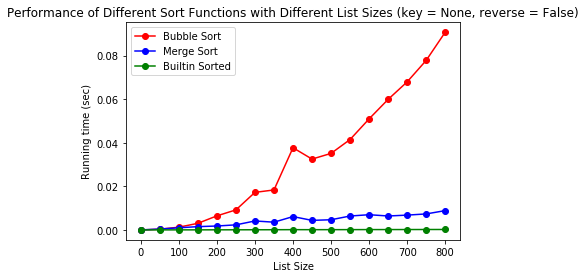

In [81]:
#Using plot to show running time differences among three algorithms on lists with 17 different sizes from 0 to 800
import matplotlib.pyplot as plt
plt.plot(size, bubble_time, 'r', marker = 'o') 
plt.plot(size, merge_time, 'b', marker = 'o') 
plt.plot(size, builtin_time, 'g', marker = 'o')
plt.legend(['Bubble Sort','Merge Sort', 'Builtin Sorted'])
plt.title('Performance of Different Sort Functions with Different List Sizes (key = None, reverse = False)')
plt.xlabel('List Size')
plt.ylabel('Running time (sec)')
plt.show()

In [82]:
#Using summary table to show 17 running times on lists with sizes 0, 50, 100,150, 200, ..., 750, 800
case1 = {
     'Merge Sort': pd.Series(merge_time, index = ['size' + str(item) for item in size]),
    'Bubble Sort': pd.Series(bubble_time, index = ['size' + str(item) for item in size]), 
     'Sorted': pd.Series(builtin_time, index = ['size' + str(item) for item in size])}
Case1 = pd.DataFrame(case1).transpose()
Case1['Complexity'] = pd.Series(['O(n^2)', 'O(nlog(n))', 'O(nlog(n))'], index = ['Bubble Sort', 'Merge Sort', 'Sorted'])
Case1

,size0,size50,size100,size150,size200,size250,size300,size350,size400,size450,size500,size550,size600,size650,size700,size750,size800,Complexity
Bubble Sort,2.861023e-06,0.000327,0.001255,0.003033,0.006456,0.009197,0.017241,0.018344,0.037720,0.032516,0.035129,0.041498,0.050970,0.059922,0.067958,0.077812,0.090743,O(n^2)
Merge Sort,9.536743e-07,0.000406,0.000983,0.001505,0.001795,0.002327,0.004108,0.003553,0.006121,0.004378,0.004669,0.006379,0.006979,0.006391,0.006794,0.007340,0.008859,O(nlog(n))
Sorted,2.498040e-06,0.000009,0.000021,0.000033,0.000044,0.000057,0.000070,0.000089,0.000121,0.000110,0.000118,0.000133,0.000152,0.000162,0.000173,0.000188,0.000203,O(nlog(n))


### Case2 : key != None, reverse = False

In [83]:
#Generate running time information about three algorithms on lists with different sizes from 0 to 800
bubble_time_key = []
merge_time_key = []
builtin_time_key = []
for l in data_set:
    bubble_time_key.append(float(bubble_sort(l, key = str.lower)[-1].split()[-1]))
    merge_time_key.append(float(merge_sort(l, key = str.lower)[-1].split()[-1]))
    builtin_time_key.append(timeit.timeit(lambda:sorted(l, key= str.lower),number=1))
print(bubble_time_key)
print(merge_time_key)
print(builtin_time_key)

[3.0994415283203125e-06, 0.0008530616760253906, 0.002894163131713867, 0.0065920352935791016, 0.012897968292236328, 0.018561124801635742, 0.030279874801635742, 0.05953812599182129, 0.046190738677978516, 0.05850982666015625, 0.07669997215270996, 0.08910894393920898, 0.10145211219787598, 0.13156914710998535, 0.15044307708740234, 0.1694169044494629, 0.21515679359436035]
[9.5367431640625e-07, 0.0004818439483642578, 0.0011069774627685547, 0.002691984176635742, 0.0022399425506591797, 0.0027756690979003906, 0.008482933044433594, 0.004210233688354492, 0.004540920257568359, 0.0051000118255615234, 0.0057260990142822266, 0.006400108337402344, 0.007280826568603516, 0.009139060974121094, 0.008414983749389648, 0.009513139724731445, 0.011853933334350586]
[3.99397686123848e-06, 2.2636959329247475e-05, 5.2560120820999146e-05, 6.569782271981239e-05, 8.773989975452423e-05, 0.0001450539566576481, 0.00018746010027825832, 0.0001819208264350891, 0.00015486986376345158, 0.00017424114048480988, 0.00022452906705

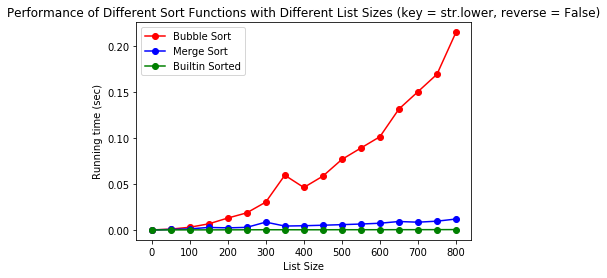

In [84]:
#Using plot to show running time differences among three algorithms on lists with 17 different sizes from 0 to 800
plt.plot(size, bubble_time_key, 'r', marker = 'o') 
plt.plot(size, merge_time_key, 'b', marker = 'o') 
plt.plot(size, builtin_time_key, 'g', marker = 'o')
plt.legend(['Bubble Sort','Merge Sort', 'Builtin Sorted'])
plt.title('Performance of Different Sort Functions with Different List Sizes (key = str.lower, reverse = False)')
plt.xlabel('List Size')
plt.ylabel('Running time (sec)')
plt.show()

In [85]:
#Using summary table to show 17 running times on lists with sizes 0, 50, 100,150, 200, ..., 750, 800
case2 = {
     'Merge Sort': pd.Series(merge_time_key, index = ['size' + str(item) for item in size]),
    'Bubble Sort': pd.Series(bubble_time_key, index = ['size' + str(item) for item in size]), 
     'Sorted': pd.Series(builtin_time_key, index = ['size' + str(item) for item in size])}
Case2 = pd.DataFrame(case2).transpose()
Case2['Complexity'] = pd.Series(['O(n^2)', 'O(nlog(n))', 'O(nlog(n))'], index = ['Bubble Sort', 'Merge Sort', 'Sorted'])
Case2

,size0,size50,size100,size150,size200,size250,size300,size350,size400,size450,size500,size550,size600,size650,size700,size750,size800,Complexity
Bubble Sort,3.099442e-06,0.000853,0.002894,0.006592,0.012898,0.018561,0.030280,0.059538,0.046191,0.058510,0.076700,0.089109,0.101452,0.131569,0.150443,0.169417,0.215157,O(n^2)
Merge Sort,9.536743e-07,0.000482,0.001107,0.002692,0.002240,0.002776,0.008483,0.004210,0.004541,0.005100,0.005726,0.006400,0.007281,0.009139,0.008415,0.009513,0.011854,O(nlog(n))
Sorted,3.993977e-06,0.000023,0.000053,0.000066,0.000088,0.000145,0.000187,0.000182,0.000155,0.000174,0.000225,0.000210,0.000230,0.000265,0.000280,0.000299,0.000368,O(nlog(n))


## Case3 : key = None, reverse = True

In [86]:
#Generate running time information about three algorithms on lists with different sizes
bubble_time_r = []
merge_time_r = []
builtin_time_r = []
for l in data_set:
    bubble_time_r.append(float(bubble_sort(l, reverse = True)[-1].split()[-1]))
    merge_time_r.append(float(merge_sort(l, reverse = True)[-1].split()[-1]))
    builtin_time_r.append(float(timeit.timeit(lambda:sorted(l, reverse = True),number=1)))
print(bubble_time_r)
print(merge_time_r)
print(builtin_time_r)

[4.291534423828125e-06, 0.0014290809631347656, 0.0013089179992675781, 0.0044100284576416016, 0.006157636642456055, 0.00952601432800293, 0.011929035186767578, 0.017154932022094727, 0.03723788261413574, 0.03370475769042969, 0.03568387031555176, 0.04126381874084473, 0.05339479446411133, 0.05866599082946777, 0.06839609146118164, 0.08107495307922363, 0.0929560661315918]
[9.5367431640625e-07, 0.0005118846893310547, 0.0009520053863525391, 0.0013267993927001953, 0.00179290771484375, 0.0027599334716796875, 0.0030231475830078125, 0.0035610198974609375, 0.005427837371826172, 0.00451970100402832, 0.004645824432373047, 0.005255937576293945, 0.007482290267944336, 0.006186962127685547, 0.006926059722900391, 0.0071868896484375, 0.008042097091674805]
[4.8370566219091415e-06, 1.3004988431930542e-05, 2.229493111371994e-05, 3.502704203128815e-05, 4.784204065799713e-05, 7.695984095335007e-05, 7.231999188661575e-05, 9.149988181889057e-05, 0.00011109793558716774, 0.00011847610585391521, 0.0001212689094245433

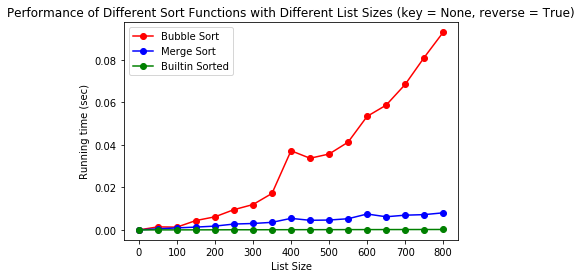

In [87]:
#Using plot to show running time differences among three algorithms on lists with 17 different sizes from 0 to 800
plt.plot(size, bubble_time_r, 'r', marker = 'o') 
plt.plot(size, merge_time_r, 'b', marker = 'o') 
plt.plot(size, builtin_time_r, 'g', marker = 'o')
plt.legend(['Bubble Sort','Merge Sort', 'Builtin Sorted'])
plt.title('Performance of Different Sort Functions with Different List Sizes (key = None, reverse = True)')
plt.xlabel('List Size')
plt.ylabel('Running time (sec)')
plt.show()

In [88]:
#Using summary table to show 17 running times on lists with sizes 0, 50, 100,150, 200, ..., 750, 800
case3 = {
     'Merge Sort': pd.Series(merge_time_r, index = ['size' + str(item) for item in size]),
    'Bubble Sort': pd.Series(bubble_time_r, index = ['size' + str(item) for item in size]), 
     'Sorted': pd.Series(builtin_time_r, index = ['size' + str(item) for item in size])}
Case3 = pd.DataFrame(case3).transpose()
Case3['Complexity'] = pd.Series(['O(n^2)', 'O(nlog(n))', 'O(nlog(n))'], index = ['Bubble Sort', 'Merge Sort', 'Sorted'])
Case3

,size0,size50,size100,size150,size200,size250,size300,size350,size400,size450,size500,size550,size600,size650,size700,size750,size800,Complexity
Bubble Sort,4.291534e-06,0.001429,0.001309,0.004410,0.006158,0.009526,0.011929,0.017155,0.037238,0.033705,0.035684,0.041264,0.053395,0.058666,0.068396,0.081075,0.092956,O(n^2)
Merge Sort,9.536743e-07,0.000512,0.000952,0.001327,0.001793,0.002760,0.003023,0.003561,0.005428,0.004520,0.004646,0.005256,0.007482,0.006187,0.006926,0.007187,0.008042,O(nlog(n))
Sorted,4.837057e-06,0.000013,0.000022,0.000035,0.000048,0.000077,0.000072,0.000091,0.000111,0.000118,0.000121,0.000149,0.000149,0.000163,0.000177,0.000189,0.000204,O(nlog(n))


## Case4: key != None, reverse = True


In [89]:
#Generate running time information about three algorithms on lists with different sizes
bubble_time_r_k = []
merge_time_r_k = []
builtin_time_r_k = []
for l in data_set:
    bubble_time_r_k.append(float(bubble_sort(l, key = str.lower, reverse = True)[-1].split()[-1]))
    merge_time_r_k.append(float(merge_sort(l, key = str.lower, reverse = True)[-1].split()[-1]))
    builtin_time_r_k.append(float(timeit.timeit(lambda:sorted(l, key = str.lower, reverse = True),number=1)))
print(bubble_time_r_k)
print(merge_time_r_k)
print(builtin_time_r_k)

[3.814697265625e-06, 0.0008161067962646484, 0.003201007843017578, 0.009131908416748047, 0.012415170669555664, 0.01861286163330078, 0.03445005416870117, 0.048995018005371094, 0.04642009735107422, 0.05922698974609375, 0.07754778861999512, 0.0888509750366211, 0.10976290702819824, 0.12825393676757812, 0.15365290641784668, 0.16660094261169434, 0.18881487846374512]
[9.5367431640625e-07, 0.0004837512969970703, 0.002076864242553711, 0.0015859603881835938, 0.0024819374084472656, 0.003774881362915039, 0.0065419673919677734, 0.004173994064331055, 0.004498958587646484, 0.005114078521728516, 0.005928993225097656, 0.0068149566650390625, 0.0073511600494384766, 0.008161067962646484, 0.009094715118408203, 0.009081125259399414, 0.009815216064453125]
[4.290137439966202e-06, 2.246210351586342e-05, 6.748293526470661e-05, 6.159394979476929e-05, 7.998105138540268e-05, 0.0001067151315510273, 0.00019836798310279846, 0.00017302692867815495, 0.0001549490261822939, 0.0001752949319779873, 0.0001967360731214285, 0.

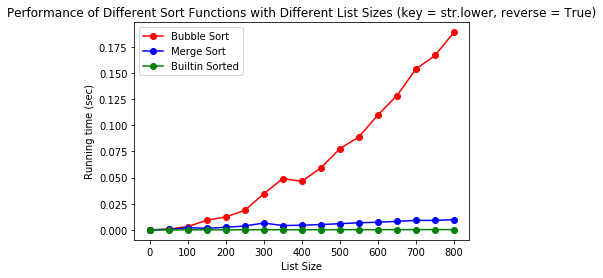

In [90]:
#Using plot to show running time differences among three algorithms on lists with 17 different sizes from 0 to 800
plt.plot(size, bubble_time_r_k, 'r', marker = 'o') 
plt.plot(size, merge_time_r_k, 'b', marker = 'o') 
plt.plot(size, builtin_time_r_k, 'g', marker = 'o')
plt.legend(['Bubble Sort','Merge Sort', 'Builtin Sorted'])
plt.title('Performance of Different Sort Functions with Different List Sizes (key = str.lower, reverse = True)')
plt.xlabel('List Size')
plt.ylabel('Running time (sec)')
plt.show()

In [91]:
#Using summary table to show 17 running time on lists with sizes 0, 50, 100,150, 200, ..., 750, 800
case4 = {
     'Merge Sort': pd.Series(merge_time_r_k, index = ['size' + str(item) for item in size]),
    'Bubble Sort': pd.Series(bubble_time_r_k, index = ['size' + str(item) for item in size]), 
     'Sorted': pd.Series(builtin_time_r_k, index = ['size' + str(item) for item in size])}
Case4 = pd.DataFrame(case4).transpose()
Case4['Complexity'] = pd.Series(['O(n^2)', 'O(nlog(n))', 'O(nlog(n))'], index = ['Bubble Sort', 'Merge Sort', 'Sorted'])
Case4

,size0,size50,size100,size150,size200,size250,size300,size350,size400,size450,size500,size550,size600,size650,size700,size750,size800,Complexity
Bubble Sort,3.814697e-06,0.000816,0.003201,0.009132,0.012415,0.018613,0.034450,0.048995,0.046420,0.059227,0.077548,0.088851,0.109763,0.128254,0.153653,0.166601,0.188815,O(n^2)
Merge Sort,9.536743e-07,0.000484,0.002077,0.001586,0.002482,0.003775,0.006542,0.004174,0.004499,0.005114,0.005929,0.006815,0.007351,0.008161,0.009095,0.009081,0.009815,O(nlog(n))
Sorted,4.290137e-06,0.000022,0.000067,0.000062,0.000080,0.000107,0.000198,0.000173,0.000155,0.000175,0.000197,0.000217,0.000236,0.000267,0.000282,0.000301,0.000323,O(nlog(n))


From the above plots and summary tables, I have the following findings:
#1. When dataset size = 0 (i.e. emptey), in all four cases, merge_sort had the shortest running time among three functions.
#2. Generally, when the dataset size is large(say larger than 100), the running time of three sorted functions have the following relationship: RunTime(built-in Sorted) < RunTime(Merge_Sort) < RunTime(Bubble_Sort). When dataset is small, as we found in my merge_sort v.s. bubble_sort examples, merge sort may perform slower than bubble_sort. (See case 1 in this example, when dataset size is 50, RunTime(bubble) < RunTime(merge). But when dataset size = 100, merge_sort ran faster.)
#3. We know that complexity of bubble sort is O(n^2), merge_sort is O(nlog(n)), sorted(TimSort) is O(nlog(n)). From the plots we made, we can see such patterns too.
#4. There are some fluctuations in the graph, I think it may be due to the higher complexity of string operations which may cause longer running time. But the overall patterns are clear to see.

## A clearer example
#### in the following example, I randomly generated lists of integers in the range [0, 10000] with list sizes (0, 100, 200, ..., 2800, 2900)
The running time of three sorted functions still follow the same pattern as the above string example. But the plotted lines are much smoother. So I put this simple example here to clarify the relationship.

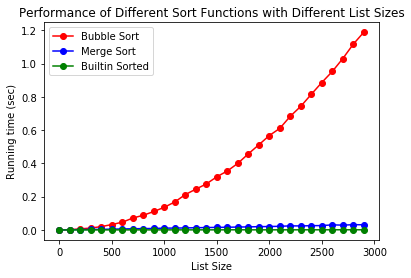

In [92]:
#generate a list of sizes from 0 to 2900 with interval = 100
s = [100 * i  for i in range(30)]
#for each list size, generate a list of integers in the range of 0 to 10000
d = []
for size in s:
    d.append([random.randint(0, 10000) for i in range(size)])
#sort the generated lists using all three functions and record the running time separately
simple_bubble = [float(bubble_sort(l)[-1].split()[-1]) for l in d] 
simple_merge = [float(merge_sort(l)[-1].split()[-1]) for l in d] 
simple_sorted = [float(timeit.timeit(lambda:sorted(l), number=1)) for l in d]
#plot the graph (smooth lines here :) )
plt.plot(s, simple_bubble, 'r', marker = 'o') 
plt.plot(s, simple_merge, 'b', marker = 'o') 
plt.plot(s, simple_sorted, 'g', marker = 'o')
plt.legend(['Bubble Sort','Merge Sort', 'Builtin Sorted'])
plt.title('Performance of Different Sort Functions with Different List Sizes')
plt.xlabel('List Size')
plt.ylabel('Running time (sec)')
plt.show()